# Importing Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset

### total 10 samples 

In [57]:
# 0 : airplane										
# 1 : automobile										
# 2 : bird										
# 3 : cat										
# 4 : deer										
# 5 : dog										
# 6 : frog										
# 7 : horse										
# 8 : ship										
# 9 : truck

In [11]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1113s 7us/step


(50000, 32, 32, 3)

In [38]:
# Traing sample : 50000
# Each Sample :32 , 32
# RGB Channel : 3

In [13]:
X_test.shape  # for test 


(10000, 32, 32, 3)

In [15]:
y_train.shape  # for train


(50000, 1)

In [17]:
y_train[:5]     #2D array (but we don't need this so we reshape it)


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [21]:
y_test = y_test.reshape(-1,)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]   # import classes

In [41]:
classes[9]  #checking the array

'truck'

In [25]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
#ploting the samples

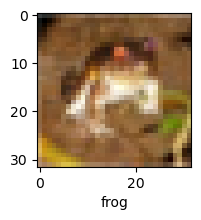

In [27]:
plot_sample(X_train, y_train, 0)   # we can change value to check for other images

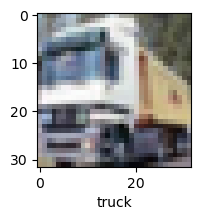

In [29]:
plot_sample(X_train, y_train, 1)   #we change 0 to 1 and its a truck

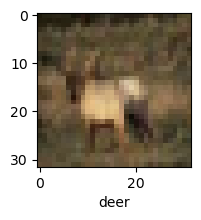

In [43]:
plot_sample(X_train, y_train, 3)

# Normalizing the training data

In [32]:
X_train = X_train / 255.0
X_test = X_test / 255.0
#the values are now normalized

# Build simple artificial neural network for image classification

In [34]:
#GPU performance
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')  # we have total 10 categories in the dataset CIFAR10  
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)
# the end of 5 epochs, accuracy is at around 49%

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.3093 - loss: 1.9250
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.4196 - loss: 1.6409
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.4510 - loss: 1.5498
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.4734 - loss: 1.4889
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4930 - loss: 1.4351


In [45]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

# classification report that check precision,recall,f1-score,support for the dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.41      0.51      1000
           1       0.58      0.54      0.56      1000
           2       0.38      0.35      0.37      1000
           3       0.33      0.35      0.34      1000
           4       0.71      0.10      0.17      1000
           5       0.33      0.51      0.40      1000
           6       0.55      0.45      0.50      1000
           7       0.49      0.60      0.54      1000
           8       0.71      0.44      0.54      1000
           9       0.36      0.76      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.44     10000
weighted avg       0.51      0.45      0.44     10000



# Now let us build a convolutional neural network to train our images

### Main part (CNN)

In [49]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # softmax normalized the pobability (activation method)
])


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [53]:
cnn.fit(X_train, y_train, epochs=10)

# With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. 
#CNN's are best for image classification and gives superb accuracy. 
#Also computation is much less compared to simple ANN 
#as maxpooling reduces the image dimensions while still preserving the features

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.3798 - loss: 1.7028
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5880 - loss: 1.1667
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6494 - loss: 1.0050
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6804 - loss: 0.9212
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7027 - loss: 0.8497
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7240 - loss: 0.7962
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7406 - loss: 0.7470
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7548 - loss: 0.7044
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7725 - loss: 0.6581
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7789 - loss: 0.6301


In [59]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7000 - loss: 0.9105


[0.9290346503257751, 0.6952000260353088]

In [61]:
y_pred = cnn.predict(X_test)
y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[1.3566646e-04, 2.0760717e-06, 2.8320053e-03, 9.6600389e-01,
        8.5964719e-05, 2.8985934e-02, 5.6634512e-05, 1.1187789e-05,
        1.8835604e-03, 3.0754243e-06],
       [2.9176235e-05, 5.5248558e-04, 4.2442363e-08, 2.9977894e-08,
        2.8677640e-09, 4.4724943e-10, 2.8717145e-10, 9.1241965e-11,
        9.9937820e-01, 4.0089373e-05],
       [1.2557381e-01, 1.5229990e-01, 6.1237050e-04, 1.2986615e-03,
        2.5998135e-04, 7.8779856e-05, 1.4914459e-04, 1.7732097e-04,
        6.9788569e-01, 2.1664480e-02],
       [9.6462202e-01, 2.3124712e-03, 3.1716344e-03, 1.9171048e-04,
        2.2995500e-04, 2.4993942e-06, 1.4201008e-05, 1.7806195e-05,
        2.9352035e-02, 8.5641324e-05],
       [5.8911178e-06, 3.3285355e-04, 4.6461925e-02, 3.1139374e-02,
        5.1751512e-01, 3.8734612e-03, 3.9997506e-01, 3.1547011e-06,
        7.7675024e-05, 6.1549607e-04]], dtype=float32)

In [62]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 8, 0, 4]

In [65]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

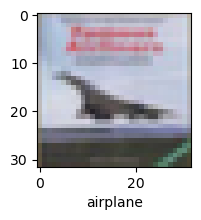

In [67]:
plot_sample(X_test, y_test,3)

In [69]:
classes[y_classes[3]]


'airplane'